# **Artificial Intelligence Lab-1**
### Ronan Mark D'souza
### 200968256
### *Data Science & Engg.*
#### *Manipal Institute of Technology, Manipal*

### Importing Libraries:

In [ ]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score

Tensorflow version: 2.9.2
Keras version: 2.9.0


### Exercise-1: FMNIST

#### Loading Dataset:

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test,y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


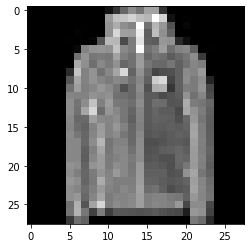

In [ ]:
plt.imshow(x_train[567],cmap = 'gray')

#### Normalizing the data

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#### Building a simple autoencoder

In [ ]:
encoding_dim = 64
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img,encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=10,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.0525 - val_loss: 0.0281
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0236 - val_loss: 0.0202
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0179 - val_loss: 0.0161
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0150 - val_loss: 0.0144
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0134 - val_loss: 0.0129
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0104 - val_loss: 0

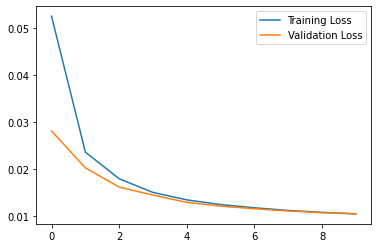

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


#### Plotting the Images

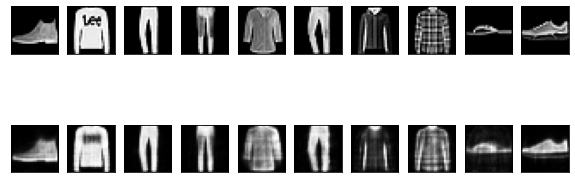

In [ ]:
n = 10 
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercise-2: ECG5000

In [ ]:
from sklearn.model_selection import train_test_split

#### Downloading Dataset

In [ ]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
print(dataframe.shape)
dataframe.head()

(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

#### Normalization:

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

In [ ]:
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

In [ ]:
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

#### Converting to bool type

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#### Seperating the normal data

In [ ]:
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

#### Seperating Anomolous data

In [ ]:
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

#### Normal ECG Curve

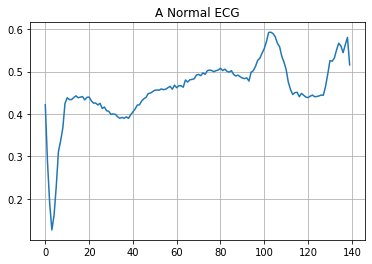

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[10])
plt.title(f"A Normal ECG")
plt.show()

#### ECG Curve with anomaly

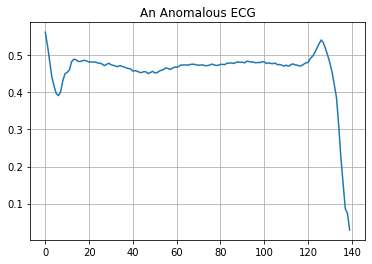

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[10])
plt.title("An Anomalous ECG")
plt.show()

#### Building the Autoencoder

In [ ]:
from tensorflow.keras.models import Model

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,epochs=10,batch_size=512,validation_data=(test_data, test_data),shuffle=True)

Epoch 1/10
5/5 [==============================] - 1s 58ms/step - loss: 0.0574 - val_loss: 0.0524
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0539 - val_loss: 0.0502
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0501 - val_loss: 0.0486
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0461 - val_loss: 0.0464
Epoch 5/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0424 - val_loss: 0.0444
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0389 - val_loss: 0.0426
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0358 - val_loss: 0.0411
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0331 - val_loss: 0.0398
Epoch 9/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0311 - val_loss: 0.0389
Epoch 10/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0293 - val_loss: 0.0379


#### Plotting Graph

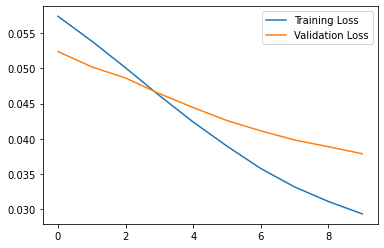

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

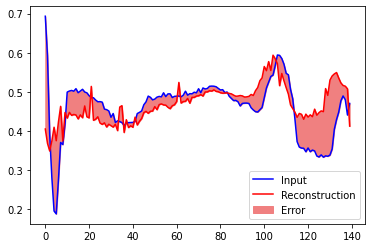

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mae(reconstructions,train_data) 

125/125 [==============================] - 0s 3ms/step


In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.05216439


In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

13/13 [==============================] - 0s 2ms/step


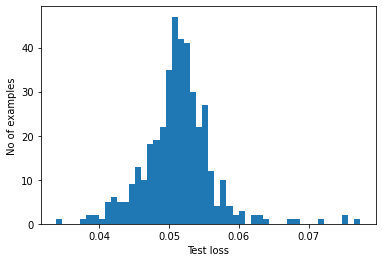

In [ ]:
plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

#### Classifying whether an ECG is an anamoly or not

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.728
Precision = 0.6976456009913259
Recall = 0.9526226734348562
